In [1]:
pwd

'/home/bijanadmin/Desktop/DL-modulators'

In [13]:
%matplotlib inline
import numpy as np
import torch
from torch import nn, optim
from torchvision import transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os

### Load all the HIT trials in a given Session (all electrodes)

In [62]:
# PATH DIRECTORY 
Sess = 15
Ch = 1
maxCh = 1
# format image (resolution):
x_size = 100
y_size = 61
################
# CHANNEL 1 ###
###############

# name directory
pathHit = 'Data/Hits/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)
# print(pathHit)
# name files
fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,1)) # name file hit (first one)
fnHitLabels = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_Hits_index.txt".format(Ch)) # name file with labels index

# load hit matrix and label vector
tensor_hit = np.loadtxt(fnHit,dtype='f',delimiter='\t') # load hit matrix
tensor_hit = tensor_hit.reshape(1,x_size,y_size) # reshape the tensor leaving dim = 0 for batches
labelsHit = np.loadtxt(fnHitLabels,dtype='l',delimiter='\t') # load labels vector


#     #plt.imshow(np.flipud(tensor_hit.transpose()))
# for all other indexes
for indx in range(2,len(labelsHit)+1):
    fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,indx)) # name file hit (following one)
    newmat_hit = np.loadtxt(fnHit,dtype='f',delimiter='\t') # load hit matrix
    newmat_hit = newmat_hit.reshape(1,x_size,y_size) # reshape 
    tensor_hit = np.concatenate((tensor_hit,newmat_hit),axis=0) # stack matrix along the 1st dimension 

#####################
# ALL OTHER CHANNELS
#####################

for Ch in range(2,maxCh+1):
    
    print('Other Channels')
    
    print('Channel: ',Ch)
    # name directory
    pathHit = 'Data/Hits/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)
#     print(pathHit)

    # name file
    fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,1)) # name file hit (first one)
    fnHitLabels = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_Hits_index.txt".format(Ch)) # name file hit (first one)

    labels_Hit = np.loadtxt(fnHitLabels,dtype='l',delimiter='\t') # load hit matrix

#     #plt.imshow(np.flipud(tensor_hit.transpose()))
    for indx in range(2,len(labels_Hit)+1):
        fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,indx)) # name file hit (following one)
        newmat_hit = np.loadtxt(fnHit,dtype='f',delimiter='\t') # load hit matrix
        newmat_hit = newmat_hit.reshape(1,x_size,y_size) # reshape 

        tensor_hit = np.concatenate((tensor_hit,newmat_hit),axis = 0) # stack matrix along the 1st dimension 

In [59]:
tensor_hit.shape

(64, 100, 61)

### Load all the MISS trials in a given Session (all electrodes)

In [64]:
# PATH DIRECTORIES 
Sess = 15
Ch = 52

################
# CHANNEL 1 ###
###############

# name directory
pathMiss = 'Data/Misses/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)
# print(pathMiss)


# name files
fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,1)) # name file miss (first one)
fnMissLabels = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_Misses_index.txt".format(Ch)) # name file with labels index

# load miss matrix and label vector
tensor_miss = np.loadtxt(fnMiss,dtype='f',delimiter='\t') # load miss matrix
tensor_miss = tensor_miss.reshape(1,x_size,y_size) # reshape the tensor leaving dim = 0 for batches
labels_Miss = np.loadtxt(fnMissLabels,dtype='l',delimiter='\t') # load labels vector

#     #plt.imshow(np.flipud(tensor_miss.transpose()))
# for all other indexes
for indx in range(2,len(labels_Miss)+1):
    fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,indx)) # name file miss (following one)
    newmat_miss = np.loadtxt(fnMiss,dtype='f',delimiter='\t') # load miss matrix
    newmat_miss = newmat_miss.reshape(1,x_size,y_size) # reshape the tensor leaving dim = 0 for batches
    tensor_miss = np.concatenate((tensor_miss,newmat_miss),axis=0) # stack matrix along the 1st dimension 
        
####################
# ALL OTHER CHANNELS
# ####################

for Ch in range(2,maxCh+1):
    
    print('Other channels...')
    
    print('Channel: ',Ch)
    # name directory
    pathMiss = 'Data/Misses/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)

    # name files
    fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,1)) # name file miss (first one)
    fnMissLabels = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_Misses_index.txt".format(Ch)) # name file with labels index

    labels_Miss = np.loadtxt(fnMissLabels,dtype='l',delimiter='\t') # load labels vector

#     #plt.imshow(np.flipud(tensor_miss.transpose()))
    for indx in range(2,len(labels_Miss)+1):
        fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,indx)) # name file miss (following one)
        newmat_miss = np.loadtxt(fnMiss,dtype='f',delimiter='\t') # load miss matrix
        newmat_miss = newmat_miss.reshape(1,x_size,y_size) # reshape the tensor leaving dim = 0 for batches
        tensor_miss = np.concatenate((tensor_miss,newmat_miss),axis=0) # stack matrix along the 1st dimension 

print(tensor_miss.shape) 

(44, 100, 61)


In [68]:
print(tensor_hit.shape)
print(tensor_miss.shape)

(64, 100, 61)
(44, 100, 61)


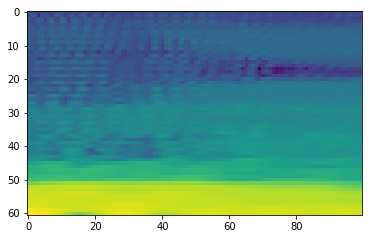

In [67]:
plt.imshow(np.flipud(tensor_hit[0,:,:].transpose()))

### Generate the labels

Generate the labels for hits and misses and stack them into a single array

In [69]:
labels_hit = np.ones(tensor_hit.shape[0],dtype='l')
labels_miss = np.zeros(tensor_miss.shape[0],dtype='l')
labels_tot = np.concatenate((labels_hit,labels_miss),axis=None)
# print(labels_tot)
print(labels_tot.shape)

(108,)


### Merge all the hits and misses matrices together

In [70]:
tensor_trial = np.concatenate((tensor_hit,tensor_miss),axis=0)
print(tensor_trial.shape)

(108, 100, 61)


### Normalize inputs

In [71]:
for indx in range(tensor_trial.shape[0]):
    mean = np.mean(tensor_trial[indx,:,:])
    std = np.std(tensor_trial[indx,:,:,])
    tensor_trial[indx,:,:,] = (tensor_trial[indx,:,:,] - mean)/std

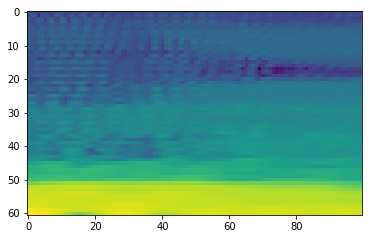

In [73]:
plt.imshow(np.flipud(tensor_trial[0,:,:].transpose()))

## Load data into a trainloader and testloader

In [84]:
TOT_data = []
for i in range(len(labels_tot)):
    TOT_data.append([tensor_trial[i,:,:], labels_tot[i]])

# set length train and test set
train_length = int(0.75*len(TOT_data))
test_length = len(TOT_data) - train_length

# split data set 
train_dataset, test_dataset = torch.utils.data.random_split(TOT_data,(train_length,test_length))

trainloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=5)
testloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=5)

In [85]:
TOT_data
# labels_tot[0]

[[array([[ 2.3660913 ,  2.2550306 ,  2.1463082 , ..., -0.95992535,
          -1.2674273 , -1.2893667 ],
         [ 2.3582978 ,  2.249965  ,  2.1287723 , ..., -1.1530542 ,
          -0.90108263, -1.2266661 ],
         [ 2.3446589 ,  2.2425609 ,  2.1100671 , ..., -1.1691093 ,
          -1.0129229 , -1.4747019 ],
         ...,
         [ 2.0734367 ,  2.0445998 ,  1.9869261 , ..., -1.2481768 ,
          -1.071376  , -1.0979526 ],
         [ 2.060577  ,  2.0344677 ,  1.975625  , ..., -1.2625173 ,
          -1.0455006 , -1.0392268 ],
         [ 2.0414824 ,  2.0184908 ,  1.9608169 , ..., -1.2965369 ,
          -1.1949456 , -1.0741427 ]], dtype=float32), 1],
 [array([[ 1.7058375 ,  1.6950676 ,  1.6773745 , ..., -1.1533722 ,
          -1.1252166 , -1.0851374 ],
         [ 1.7100687 ,  1.6935292 ,  1.6819901 , ..., -1.1651036 ,
          -0.9142424 , -0.96943796],
         [ 1.7166077 ,  1.6900675 ,  1.6885291 , ..., -1.007671  ,
          -0.9675149 , -1.0394037 ],
         ...,
         [ 2.71

### Create iterable as a test 

The batch_size decides how many images in the batch during the training or test.
The numb of iteration in each train (test) loader are: tot length of train (test) data / batch_size. So if the tot number of data is 2000 and the batch size is 50, the iteration on the dataloader is done 40 times, each time 50 images are loaded 

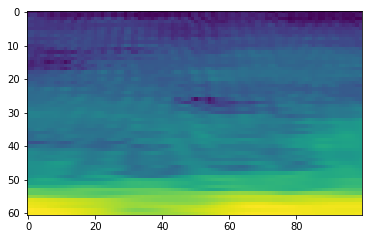

0


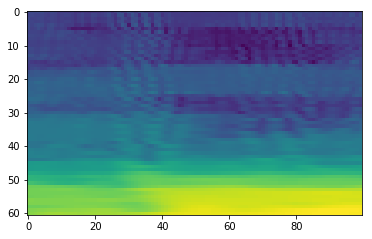

1


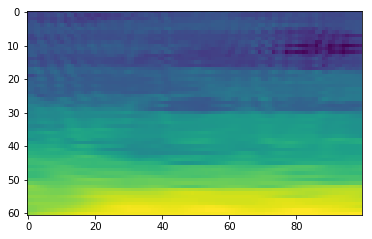

2


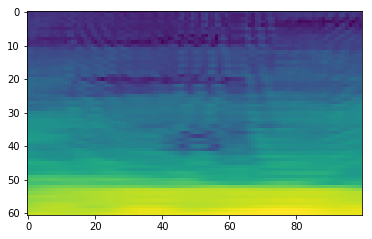

3


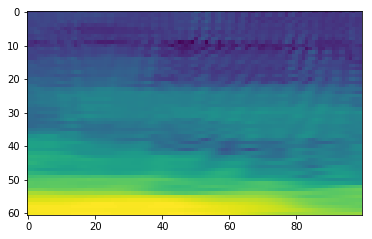

4
torch.Size([5])
torch.Size([5, 100, 61])
tensor(1)


In [86]:
batch_size = 5
images, labels = next(iter(testloader))
for b in range(batch_size):
    plt.imshow(np.flipud(images[b].numpy().transpose()))
    plt.show()
    print(b)
print(labels.shape)
print(images.shape)
print(labels[0])

In [90]:
images[0].std()
labels

tensor([1, 0, 1, 1, 1])

In [91]:
images.view(images.shape[0],-1).shape

torch.Size([5, 6100])

### Define the Network: Multilayer perceptron 
Use some dropout

In [101]:
class FFN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # linear layers
        self.fc1 = nn.Linear(6100,3000)
        self.fc2 = nn.Linear(3000, 1500)
        self.fc3 = nn.Linear(1500,381)
        self.fc4 = nn.Linear(381,2)
#         self.fc5 = nn.Linear(381,2)
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)    
    
    def forward(self,x):
        
        # flatten the input tensor 
        x = x.view(x.shape[0],-1)
        
        # activation functions
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
#         x = self.fc4(x)
#         x = F.relu(self.fc4(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [102]:
model = FFN()
model
# model.fc1.weight.data.normal_(std=0.01)
# model.fc2.weight.data.normal_(std=0.01)
# model.fc3.weight.data.normal_(std=0.01)

FFN(
  (fc1): Linear(in_features=6100, out_features=3000, bias=True)
  (fc2): Linear(in_features=3000, out_features=1500, bias=True)
  (fc3): Linear(in_features=1500, out_features=381, bias=True)
  (fc4): Linear(in_features=381, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

### Set loss function and optimizer

In [103]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

#### Move model on GPU if available 

In [104]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.')
else:
    print('CUDA is available!')

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()
    print('Moving model on GPU...')
next(model.parameters()).is_cuda
train_on_gpu

CUDA is available!
Moving model on GPU...


True

In [97]:
labels

tensor([1, 0, 1, 1, 1])

## Train the Network

#### You can skip this and go to the next cell, where you train and validate at the same time 

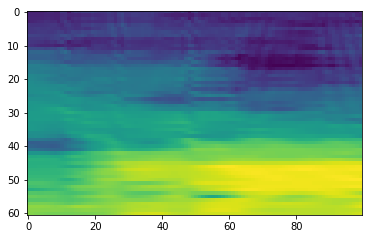

Log ps :  tensor([[-0.9711, -0.4759]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4759, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4759078323841095 running_loss:  0.4759078323841095


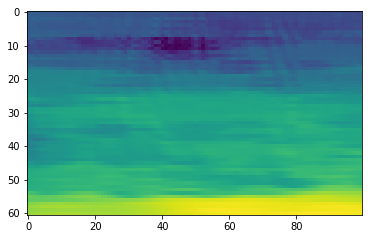

Log ps :  tensor([[-0.9835, -0.4684]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4684, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4683813154697418 running_loss:  0.9442891478538513


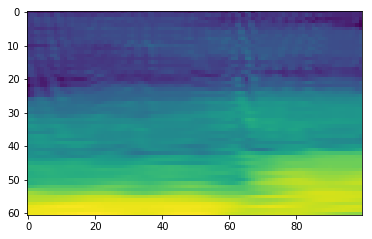

Log ps :  tensor([[-0.9961, -0.4610]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4610, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4609507918357849 running_loss:  1.4052399396896362


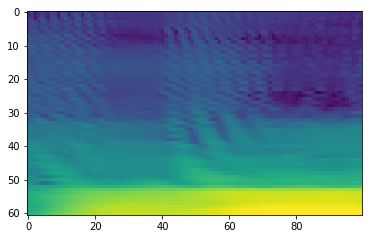

Log ps :  tensor([[-1.0088, -0.4536]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4536, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.45361772179603577 running_loss:  1.858857661485672


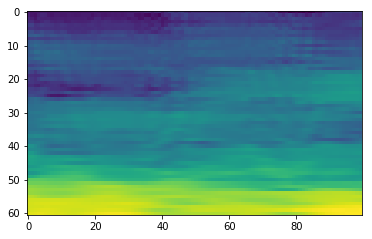

Log ps :  tensor([[-1.0215, -0.4464]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4464, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.44638293981552124 running_loss:  2.3052406013011932


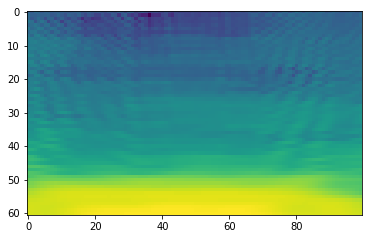

Log ps :  tensor([[-1.0343, -0.4392]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0343, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.034289836883545 running_loss:  3.339530438184738


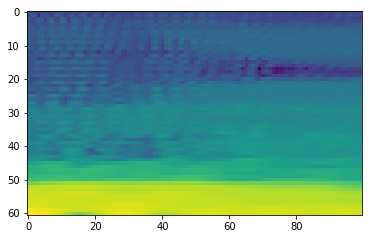

Log ps :  tensor([[-1.0389, -0.4367]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4367, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4367242157459259 running_loss:  3.776254653930664


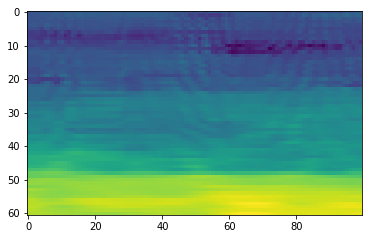

Log ps :  tensor([[-1.0448, -0.4335]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4335, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.43350303173065186 running_loss:  4.209757685661316


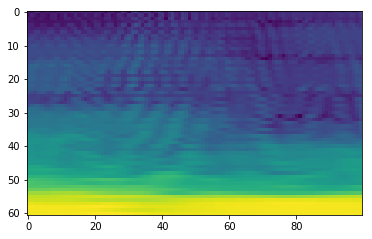

Log ps :  tensor([[-1.0517, -0.4298]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4298, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.42975935339927673 running_loss:  4.639517039060593


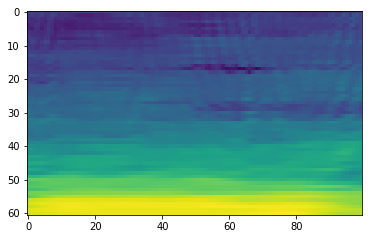

Log ps :  tensor([[-1.0595, -0.4256]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4256, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.425618439912796 running_loss:  5.065135478973389


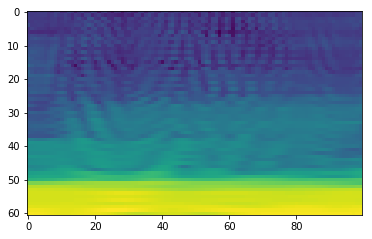

Log ps :  tensor([[-1.0679, -0.4212]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0679, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.067918300628662 running_loss:  6.133053779602051


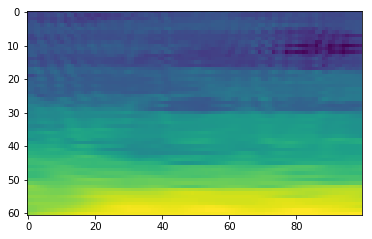

Log ps :  tensor([[-1.0717, -0.4192]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4192, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.41919365525245667 running_loss:  6.5522474348545074


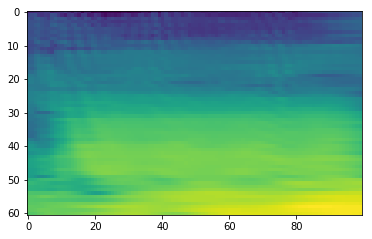

Log ps :  tensor([[-1.0765, -0.4167]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0765, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0765163898468018 running_loss:  7.628763824701309


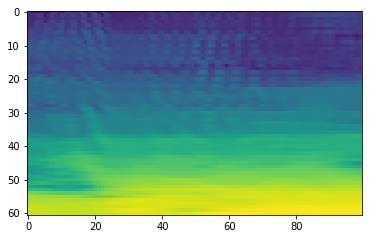

Log ps :  tensor([[-1.0779, -0.4160]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0779, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0778522491455078 running_loss:  8.706616073846817


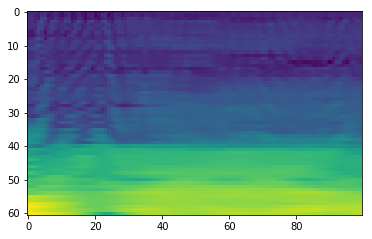

Log ps :  tensor([[-1.0765, -0.4167]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0765, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0765351057052612 running_loss:  9.783151179552078


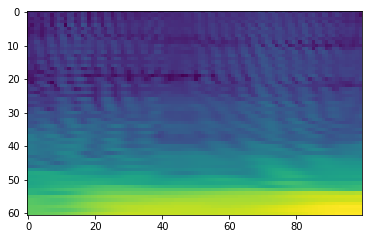

Log ps :  tensor([[-1.0731, -0.4184]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4184, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4184480607509613 running_loss:  10.20159924030304


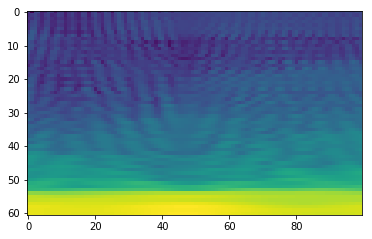

Log ps :  tensor([[-1.0713, -0.4194]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4194, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.419410765171051 running_loss:  10.62101000547409


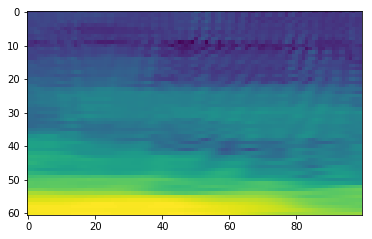

Log ps :  tensor([[-1.0708, -0.4197]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4197, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4196653366088867 running_loss:  11.040675342082977


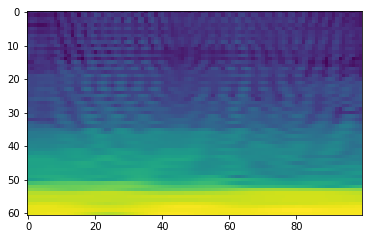

Log ps :  tensor([[-1.0715, -0.4193]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4193, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.419291228055954 running_loss:  11.459966570138931


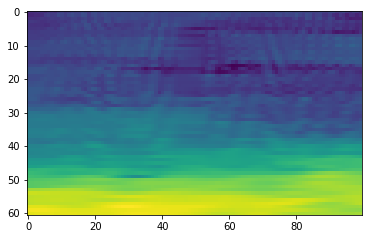

Log ps :  tensor([[-1.0733, -0.4184]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4184, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.418359637260437 running_loss:  11.878326207399368


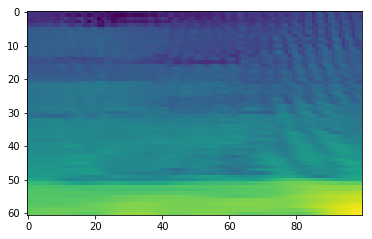

Log ps :  tensor([[-1.0761, -0.4169]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4169, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.41693463921546936 running_loss:  12.295260846614838


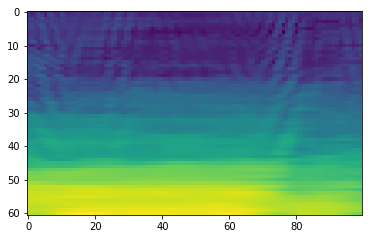

Log ps :  tensor([[-1.0797, -0.4151]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0797, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0796669721603394 running_loss:  13.374927818775177


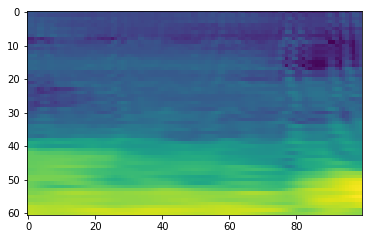

Log ps :  tensor([[-1.0807, -0.4146]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0807, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.080671787261963 running_loss:  14.45559960603714


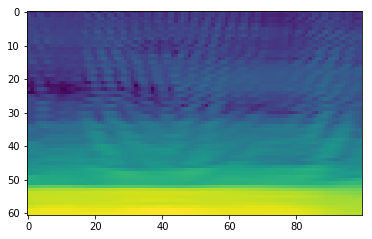

Log ps :  tensor([[-1.0795, -0.4152]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4152, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.41516196727752686 running_loss:  14.870761573314667


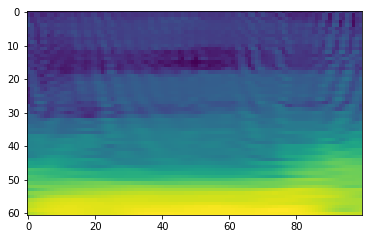

Log ps :  tensor([[-1.0795, -0.4152]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0795, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0794920921325684 running_loss:  15.950253665447235


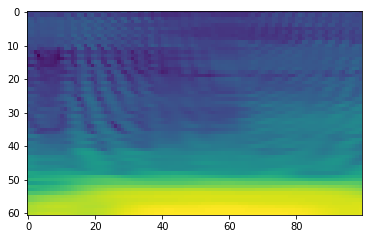

Log ps :  tensor([[-1.0775, -0.4162]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4162, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.41619059443473816 running_loss:  16.366444259881973


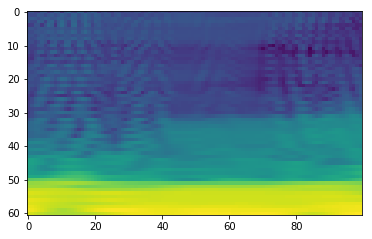

Log ps :  tensor([[-1.0767, -0.4166]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0767, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0767323970794678 running_loss:  17.44317665696144


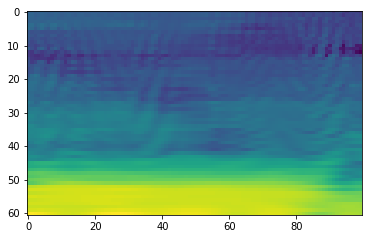

Log ps :  tensor([[-1.0741, -0.4179]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0741, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0741223096847534 running_loss:  18.517298966646194


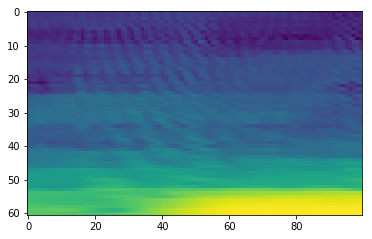

Log ps :  tensor([[-1.0699, -0.4201]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4201, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.42011478543281555 running_loss:  18.93741375207901


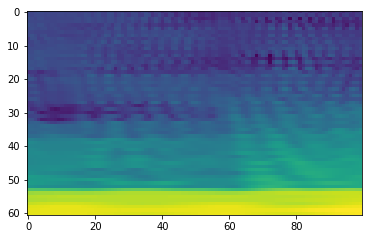

Log ps :  tensor([[-1.0650, -0.4227]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4227, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.42272013425827026 running_loss:  19.36013388633728


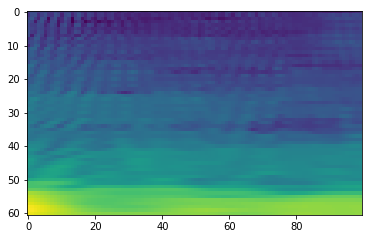

Log ps :  tensor([[-1.0656, -0.4224]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4224, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.42236801981925964 running_loss:  19.78250190615654


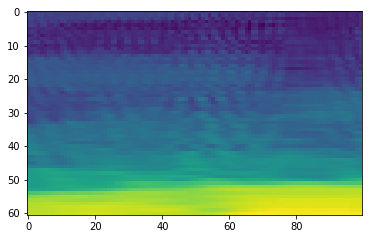

Log ps :  tensor([[-1.0653, -0.4226]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4226, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.42256590723991394 running_loss:  20.205067813396454


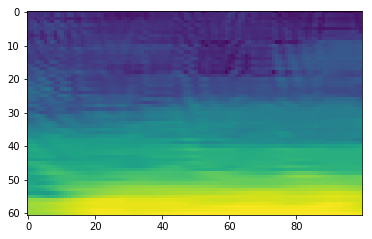

Log ps :  tensor([[-1.0659, -0.4222]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4222, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4222199022769928 running_loss:  20.627287715673447


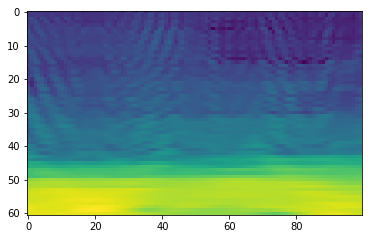

Log ps :  tensor([[-1.0675, -0.4214]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0675, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.067518711090088 running_loss:  21.694806426763535


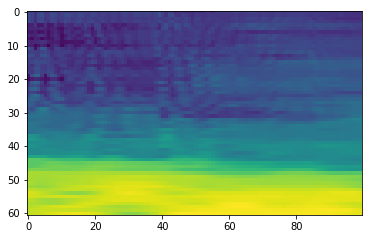

Log ps :  tensor([[-1.0671, -0.4216]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0671, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.067055583000183 running_loss:  22.761862009763718


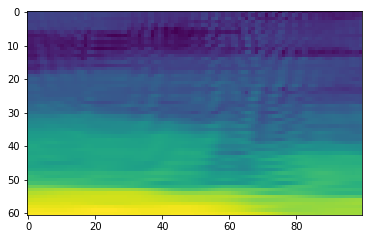

Log ps :  tensor([[-1.0648, -0.4228]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4228, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4228087067604065 running_loss:  23.184670716524124


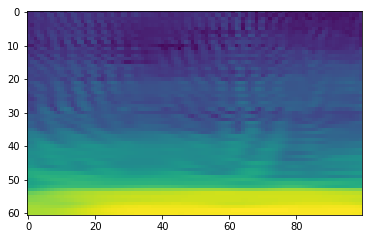

Log ps :  tensor([[-1.0637, -0.4234]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4234, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.42336851358413696 running_loss:  23.60803923010826


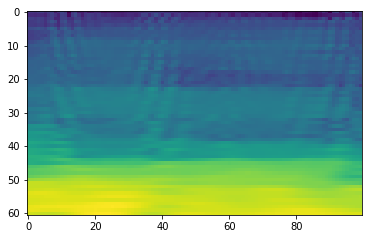

Log ps :  tensor([[-1.0638, -0.4234]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0638, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0637563467025757 running_loss:  24.671795576810837


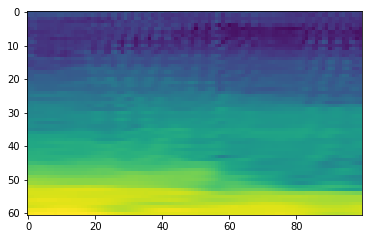

Log ps :  tensor([[-1.0619, -0.4243]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4243, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.42431578040122986 running_loss:  25.096111357212067


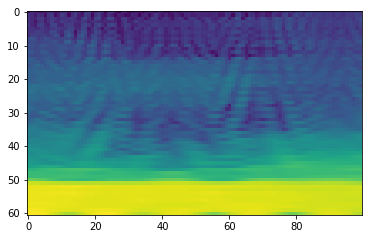

Log ps :  tensor([[-1.0613, -0.4247]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0613, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0612760782241821 running_loss:  26.15738743543625


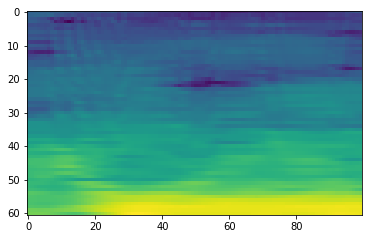

Log ps :  tensor([[-1.0589, -0.4259]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0589, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0588765144348145 running_loss:  27.216263949871063


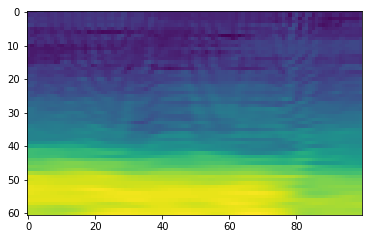

Log ps :  tensor([[-1.0550, -0.4280]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0550, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0549664497375488 running_loss:  28.271230399608612


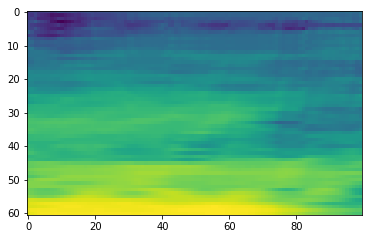

Log ps :  tensor([[-1.0497, -0.4308]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0497, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.049742579460144 running_loss:  29.320972979068756


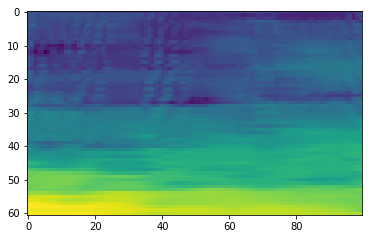

Log ps :  tensor([[-1.0434, -0.4343]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4343, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4342697262763977 running_loss:  29.755242705345154


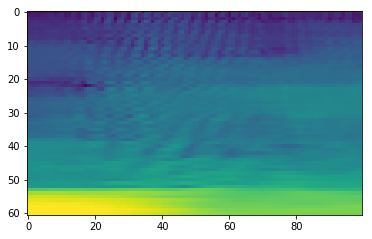

Log ps :  tensor([[-1.0386, -0.4369]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4369, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.43689027428627014 running_loss:  30.192132979631424


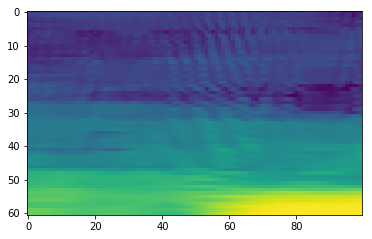

Log ps :  tensor([[-1.0352, -0.4388]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4388, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4387514293193817 running_loss:  30.630884408950806


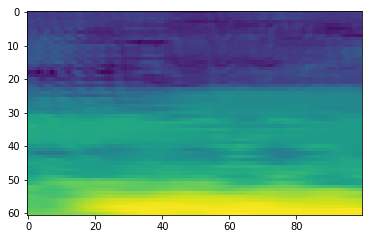

Log ps :  tensor([[-1.0331, -0.4399]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4399, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4399152100086212 running_loss:  31.070799618959427


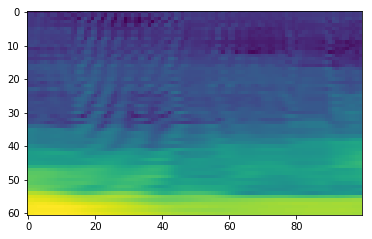

Log ps :  tensor([[-1.0321, -0.4404]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0321, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0321290493011475 running_loss:  32.102928668260574


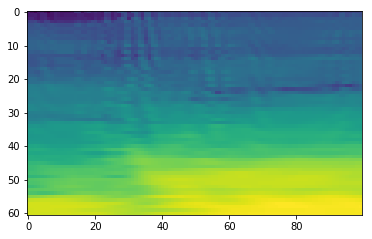

Log ps :  tensor([[-1.0296, -0.4419]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0296, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.02957284450531 running_loss:  33.132501512765884


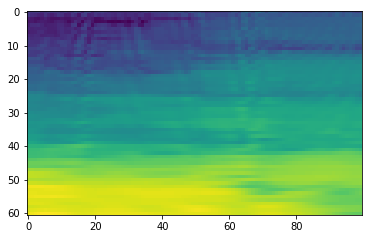

Log ps :  tensor([[-1.0256, -0.4441]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0256, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.025606632232666 running_loss:  34.15810814499855


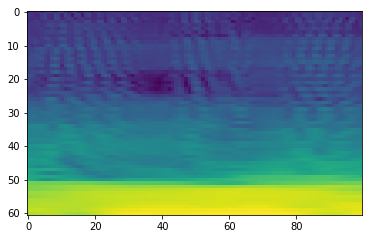

Log ps :  tensor([[-1.0204, -0.4470]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0204, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0204055309295654 running_loss:  35.178513675928116


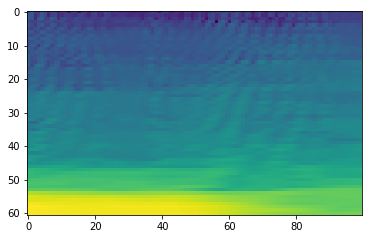

Log ps :  tensor([[-1.0141, -0.4505]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4505, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4505442976951599 running_loss:  35.629057973623276


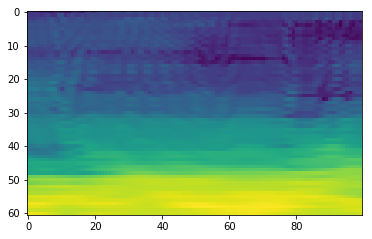

Log ps :  tensor([[-1.0094, -0.4532]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4532, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4532419443130493 running_loss:  36.082299917936325


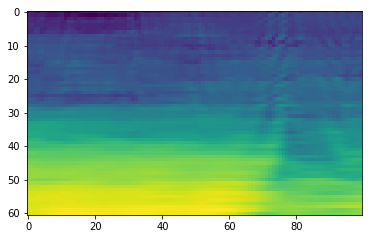

Log ps :  tensor([[-1.0061, -0.4551]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0061, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0060886144638062 running_loss:  37.08838853240013


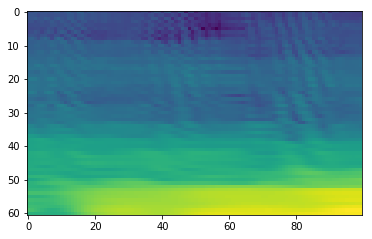

Log ps :  tensor([[-1.0015, -0.4578]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(1.0015, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  1.0015069246292114 running_loss:  38.08989545702934


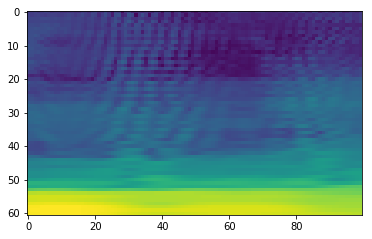

Log ps :  tensor([[-0.9958, -0.4611]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4611, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.461117684841156 running_loss:  38.5510131418705


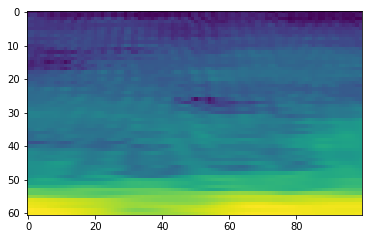

Log ps :  tensor([[-0.9916, -0.4636]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4636, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.46357983350753784 running_loss:  39.01459297537804


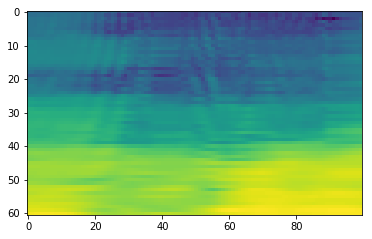

Log ps :  tensor([[-0.9888, -0.4653]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.9888, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.9887948036193848 running_loss:  40.00338777899742


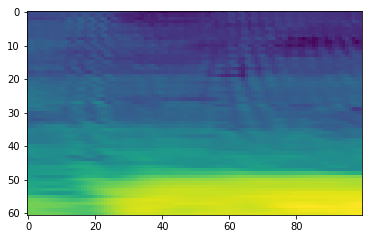

Log ps :  tensor([[-0.9847, -0.4677]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4677, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4677000045776367 running_loss:  40.47108778357506


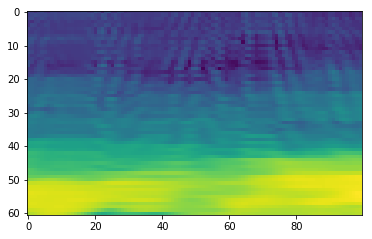

Log ps :  tensor([[-0.9819, -0.4694]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.9819, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.9819152355194092 running_loss:  41.45300301909447


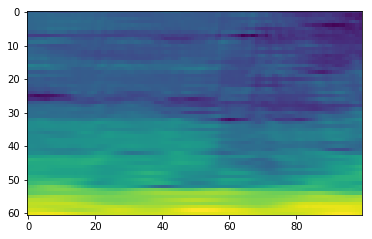

Log ps :  tensor([[-0.9779, -0.4718]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.9779, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.9778759479522705 running_loss:  42.43087896704674


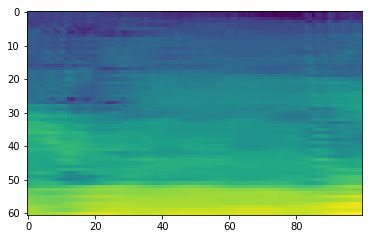

Log ps :  tensor([[-0.9727, -0.4749]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4749, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.474903404712677 running_loss:  42.905782371759415


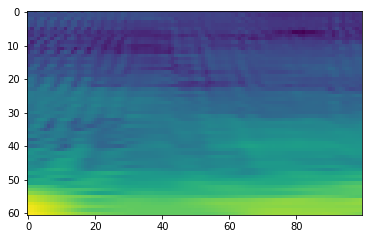

Log ps :  tensor([[-0.9690, -0.4772]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4772, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4771629273891449 running_loss:  43.38294529914856


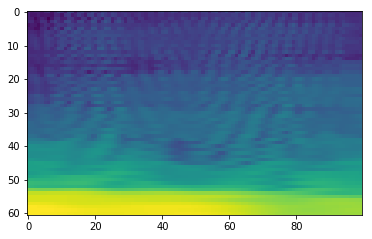

Log ps :  tensor([[-0.9666, -0.4786]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4786, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4786296784877777 running_loss:  43.86157497763634


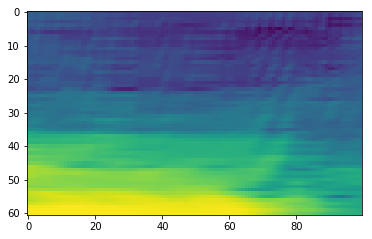

Log ps :  tensor([[-0.9654, -0.4794]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.9654, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.9654077291488647 running_loss:  44.8269827067852


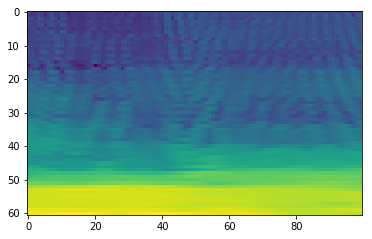

Log ps :  tensor([[-0.9628, -0.4810]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.9628, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.9627875685691833 running_loss:  45.789770275354385


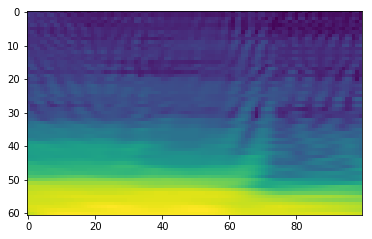

Log ps :  tensor([[-0.9589, -0.4834]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.9589, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.9589174389839172 running_loss:  46.7486877143383


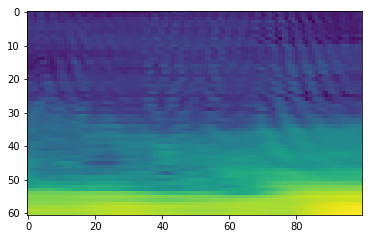

Log ps :  tensor([[-0.9539, -0.4865]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4865, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.48648786544799805 running_loss:  47.2351755797863


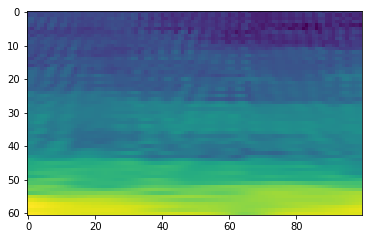

Log ps :  tensor([[-0.9504, -0.4887]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4887, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4887070059776306 running_loss:  47.72388258576393


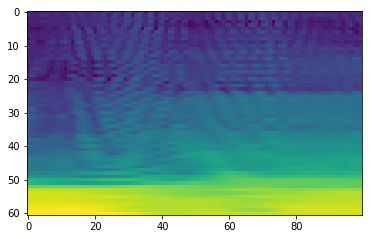

Log ps :  tensor([[-0.9482, -0.4901]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4901, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.49011626839637756 running_loss:  48.21399885416031


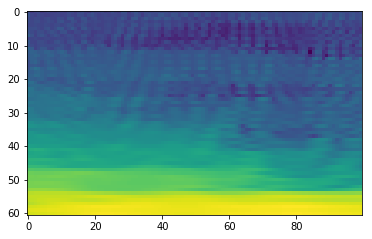

Log ps :  tensor([[-0.9471, -0.4908]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4908, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4907865822315216 running_loss:  48.70478543639183


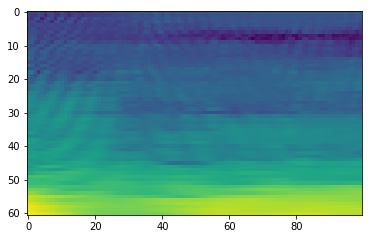

Log ps :  tensor([[-0.9471, -0.4908]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4908, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.49078571796417236 running_loss:  49.195571154356


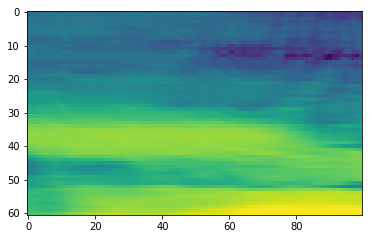

Log ps :  tensor([[-0.9481, -0.4902]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4902, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.49017712473869324 running_loss:  49.685748279094696


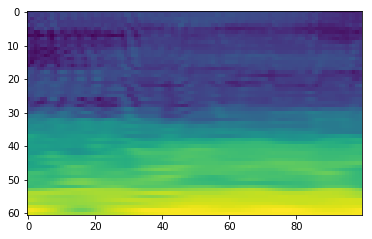

Log ps :  tensor([[-0.9499, -0.4890]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4890, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4890206456184387 running_loss:  50.174768924713135


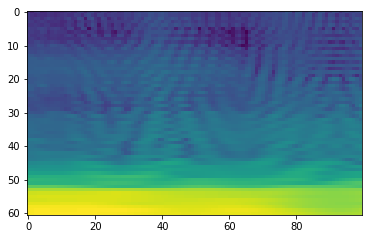

Log ps :  tensor([[-0.9525, -0.4874]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4874, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4873722195625305 running_loss:  50.662141144275665


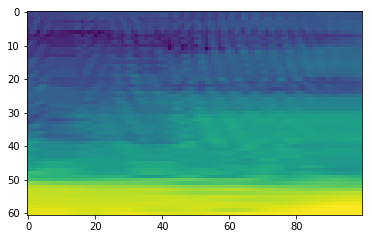

Log ps :  tensor([[-0.9559, -0.4853]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4853, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.48528391122817993 running_loss:  51.147425055503845


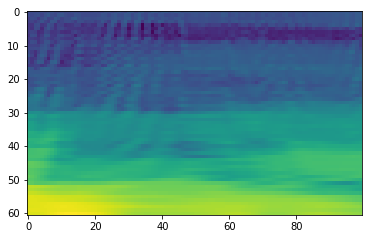

Log ps :  tensor([[-0.9599, -0.4828]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.9599, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.9598532915115356 running_loss:  52.10727834701538


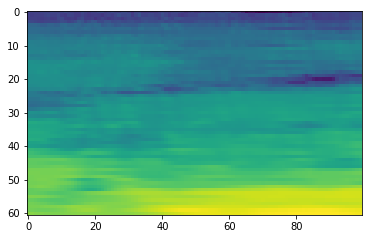

Log ps :  tensor([[-0.9619, -0.4815]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4815, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4815475344657898 running_loss:  52.58882588148117


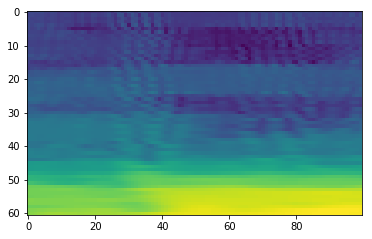

Log ps :  tensor([[-0.9647, -0.4798]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.9647, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.9646769165992737 running_loss:  53.553502798080444


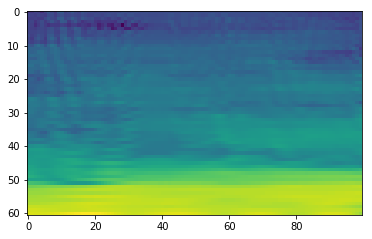

Log ps :  tensor([[-0.9656, -0.4792]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4792, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4792355000972748 running_loss:  54.03273829817772


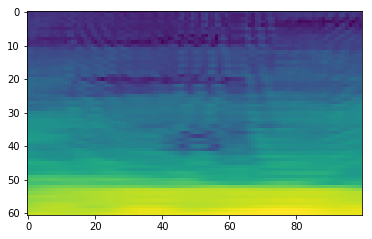

Log ps :  tensor([[-0.9675, -0.4781]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

Loss:  tensor(0.4781, device='cuda:0', grad_fn=<NllLossBackward>)
loss item:  0.4781171679496765 running_loss:  54.510855466127396
Training loss: 0.6729735242731777


In [214]:
#######################
#     TRAINING  
######################

model.train() # set the network in training mode

epochs = 1
train_losses, test_losses = [], []

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
    
        if train_on_gpu: # move data on GPU
            images, labels = images.cuda(), labels.cuda()
            
        # flatten images into a vector
#         labels = labels.long() # change label type from int to long 
        
        # Clear the gradients
        optimizer.zero_grad()
        
        log_ps = model(images) # forward pass
        loss = criterion(log_ps,labels) # compute the loss
        loss.backward() # backpropagate to compute the gradients
        optimizer.step() # update the weights
        print('Log ps : ',log_ps)
        print()
        print('Loss: ',loss)
        
        running_loss += loss.item()
        
        print('loss item: ',loss.item(),'running_loss: ',running_loss)
    
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

In [100]:
print(len(test_dataset))
print(len(testloader))
batch_size

27
6


5

## Train and validate the Network 

Training and Testing is done on the fly:
<br>
For each epoch the model is trained (the loss is computed by using the training set) and it is tested (the loss and accuracy are computed by using the test set), in order to compare training loss with testing loss and decide when to stop the training and avoid overfitting. 

In [106]:
#######################
#     TRAINING  
######################

model.train() # set the network in training mode

epochs = 1
train_losses, test_losses = [], []

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        if train_on_gpu: # move data on GPU
            images, labels = images.cuda(), labels.cuda()
            
        # flatten images into a vector
#         labels = labels.long() # change label type from int to long 
        
        # Clear the gradients
        optimizer.zero_grad()
        
        log_ps = model(images) # forward pass
        loss = criterion(log_ps,labels) # compute the loss
        loss.backward() # backpropagate to compute the gradients
        optimizer.step() # update the weights
        
        running_loss =+ loss.item()
    
    else:
        
        #######################
        #     VALIDATION 
        ######################
 
        test_loss = 0
        accuracy = 0
        with torch.no_grad(): # set the tracing of gradients to zero
            model.eval() # set the dropout to OFF, i.e. model is in evaluation mode
            

            for images, labels in testloader:
                
#                 for b in range(batch_size):
#                     plt.imshow(np.flipud(images[b].numpy().transpose()))
#                     plt.show()
            
                if train_on_gpu: # move data on GPU
                    images, labels = images.cuda(), labels.cuda()
                
                 # flatten images into a vector
#                 labels = labels.long() # change label type from int to long 
                
                print('\n\n************ New batch....\n')
                log_ps = model(images)
                test_loss += criterion(log_ps,labels)
            
                print('Log ps : \n',log_ps)
                print()
                print('Test loss: ',test_loss)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)         
                print('ps: \n',ps)
                print()
                print('top_p: \n',top_p,'\ntop_class\n: ',top_class)
                print()
                print('labels: ',labels)
                
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)) 
                
                print('Equals: \n',equals)
                print('accuracy: ',accuracy)
                
                
        model.train() # set the model back to train mode, i.e. dropout is ON
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
            
            
        ############################
        # PRINT ACCURACTY AND LOSSES
        ############################
        
        print("\n\nEpoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))



************ New batch....

Log ps : 
 tensor([[-1.4044e+01, -9.5367e-07],
        [-1.9923e+01,  0.0000e+00],
        [-1.0240e+01, -3.5763e-05],
        [-1.4846e+01, -4.7684e-07],
        [-1.6692e+01,  0.0000e+00]], device='cuda:0')

Test loss:  tensor(2.8089, device='cuda:0')
ps: 
 tensor([[7.9535e-07, 1.0000e+00],
        [2.2263e-09, 1.0000e+00],
        [3.5725e-05, 9.9996e-01],
        [3.5698e-07, 1.0000e+00],
        [5.6317e-08, 1.0000e+00]], device='cuda:0')

top_p: 
 tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]], device='cuda:0') 
top_class
:  tensor([[1],
        [1],
        [1],
        [1],
        [1]], device='cuda:0')

labels:  tensor([0, 1, 1, 1, 1], device='cuda:0')
Equals: 
 tensor([[False],
        [ True],
        [ True],
        [ True],
        [ True]], device='cuda:0')
accuracy:  tensor(0.8000)


************ New batch....

Log ps : 
 tensor([[-1.3303e+01, -1.4305e-06],
        [-1.5788e+01,  0.0000e+00],
    

In [69]:
accuracy/len(testloader)

tensor(0.4833)

In [22]:
count = 1
for images, labels in testloader:
    log_ps = model.cpu()(images)
    print(log_ps)
    count += 1

tensor([[-0.8413, -0.5641],
        [-0.8445, -0.5617],
        [-0.8451, -0.5613],
        [-0.8402, -0.5650],
        [-0.8411, -0.5643]], grad_fn=<LogSoftmaxBackward>)
tensor([[-0.8406, -0.5647],
        [-0.8402, -0.5650],
        [-0.8452, -0.5612],
        [-0.8313, -0.5718],
        [-0.8391, -0.5658]], grad_fn=<LogSoftmaxBackward>)
tensor([[-0.8451, -0.5613],
        [-0.8411, -0.5643],
        [-0.8445, -0.5617],
        [-0.8440, -0.5621],
        [-0.8401, -0.5650]], grad_fn=<LogSoftmaxBackward>)
tensor([[-0.8396, -0.5654],
        [-0.8452, -0.5612],
        [-0.8445, -0.5617],
        [-0.8402, -0.5650],
        [-0.8443, -0.5619]], grad_fn=<LogSoftmaxBackward>)
tensor([[-0.8384, -0.5664],
        [-0.8327, -0.5707],
        [-0.8291, -0.5735],
        [-0.8447, -0.5616],
        [-0.8386, -0.5662]], grad_fn=<LogSoftmaxBackward>)
tensor([[-0.8343, -0.5695],
        [-0.8409, -0.5644]], grad_fn=<LogSoftmaxBackward>)


In [53]:
images, labels = next(iter(testloader))
if train_on_gpu: # move data on GPU
    images, labels = images.cuda(), labels.cuda()
log_ps = model(images)
test_loss = criterion(log_ps,labels)
print('log_ps: ')

log_ps tensor([[-0.9754, -0.4733],
        [-0.9771, -0.4723],
        [-0.9754, -0.4733],
        [-0.9754, -0.4733],
        [-0.9754, -0.4733]], device='cuda:0', grad_fn=<LogSoftmaxBackward>) test_loss 0.5734991431236267


In [34]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 6100) # Test only the first image
model.cpu()
#Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    

#Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print('Label: ',labels[0].numpy()) # print the label corresponding to the first image
print('Probability:  ',ps.numpy()) # print prob for 0 and 1 corresponding to the first layer

# helper.view_classify(img.view(100,61), ps)

Label:  1
Probability:   [[0.41619873 0.5838012 ]]


### Other tests, not relevant 

In [101]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 6100) # Test only the first image
model.cpu()
#Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    

#Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print('Label: ',labels[0].numpy()) # print the label corresponding to the first image
print('Probability:  ',ps.numpy()) # print prob for 0 and 1 corresponding to the first layer

# helper.view_classify(img.view(100,61), ps)

Label:  1
Probability:   [[0.4318198  0.56818026]]


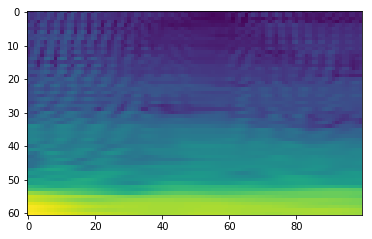

In [70]:
img.view(100,61).numpy()
plt.imshow(np.flipud(img.view(100,61).numpy().transpose()))

In [103]:
top_p, top_class = ps.topk(2, dim=1)
print(top_p)
print(top_class)
print

tensor([[0.5682, 0.4318]])
tensor([[1, 0]])


In [112]:
next(model.parameters()).is_cuda

False

In [47]:
images, labels = next(iter(trainloader))
with torch.no_grad():
    logps = model(images)
    
ps = torch.exp(logps)
print(ps)
print(labels)

RuntimeError: Expected object of device type cuda but got device type cpu for argument #2 'mat1' in call to _th_addmm

In [124]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]])


In [134]:
equals = top_class == labels.view(*top_class.shape)
print(equals)

tensor([[ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False]])


In [135]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 50.0%
